In [1]:
# set conda
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

# install psi4
!conda install -y psi4 python=3.7 -c psi4

# set path
import sys
sys.path.append("/usr/local/lib/python3.7/site-packages/")

--2022-04-20 06:03:37--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2022-04-20 06:03:38--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75660608 (72M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  72.16M  97.1MB/s    in 0.7s    

2022-04-20 06:03:38 (97.1 MB/s) - ‘Miniconda3-latest-Linu

In [2]:
# import Psi4
import psi4
# check Psi4 version
print(psi4.__version__)

1.5



Distance 3.70
  Total=-1.7948
  Elst=-0.98
  Exch=6.06
  Ind=-0.34
  Disp=-6.53

Distance 3.94
  Total=-1.9111
  Elst=-0.03
  Exch=3.06
  Ind=-0.22
  Disp=-4.72

Distance 4.17
  Total=-1.6788
  Elst=0.38
  Exch=1.55
  Ind=-0.15
  Disp=-3.45

Distance 4.41
  Total=-1.3575
  Elst=0.53
  Exch=0.78
  Ind=-0.11
  Disp=-2.55

Distance 4.64
  Total=-1.0505
  Elst=0.55
  Exch=0.39
  Ind=-0.08
  Disp=-1.91

Distance 4.88
  Total=-0.7914
  Elst=0.52
  Exch=0.19
  Ind=-0.06
  Disp=-1.44

Distance 5.11
  Total=-0.5851
  Elst=0.46
  Exch=0.09
  Ind=-0.04
  Disp=-1.10

Distance 5.35
  Total=-0.4258
  Elst=0.41
  Exch=0.04
  Ind=-0.03
  Disp=-0.85

Distance 5.59
  Total=-0.3055
  Elst=0.35
  Exch=0.02
  Ind=-0.02
  Disp=-0.66

Distance 5.82
  Total=-0.2158
  Elst=0.31
  Exch=0.01
  Ind=-0.01
  Disp=-0.52

Distance 6.06
  Total=-0.1497
  Elst=0.26
  Exch=0.00
  Ind=-0.01
  Disp=-0.41

Distance 6.29
  Total=-0.1014
  Elst=0.23
  Exch=0.00
  Ind=-0.00
  Disp=-0.33

Distance 6.53
  Total=-0.0664
  Elst=

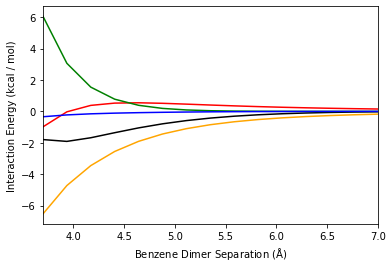

In [4]:
import psi4
import numpy as np
import matplotlib.pyplot as plt

har2kcalmol = 627.509
psi4.core.set_output_file('bz_dimer_sapt.out')
psi4.set_memory("10 GB")
psi4.set_num_threads(2)
psi4.set_options({"basis" : "jun-cc-pvdz"})

def run_sapt(mol):

    psi4.energy('sapt2', molecule=mol)
    return (har2kcalmol * psi4.variable('SAPT TOTAL ENERGY'),
            har2kcalmol * psi4.variable('SAPT ELST ENERGY'),
            har2kcalmol * psi4.variable('SAPT EXCH ENERGY'),
            har2kcalmol * psi4.variable('SAPT IND ENERGY'),
            har2kcalmol * psi4.variable('SAPT DISP ENERGY'))


if __name__ == '__main__':

    rs = np.linspace(3.7, 7.0, 15)
    energies = []
    for r_cc in rs:
        bz_dimer = psi4.geometry(f"""
        0 1
        C      0.000000000000     {r_cc}     1.391500000000
        H      0.000000000000     {r_cc}     2.471500000000
        C      1.205074349366     {r_cc}     0.695750000000
        H      2.140381785453     {r_cc}     1.235750000000
        C      1.205074349366     {r_cc}    -0.695750000000
        H      2.140381785453     {r_cc}    -1.235750000000
        C     -0.000000000000     {r_cc}    -1.391500000000
        H     -0.000000000000     {r_cc}    -2.471500000000
        C     -1.205074349366     {r_cc}    -0.695750000000
        H     -2.140381785453     {r_cc}    -1.235750000000
        C     -1.205074349366     {r_cc}     0.695750000000
        H     -2.140381785453     {r_cc}     1.235750000000
        --
        0 1
        C     -1.205074349366     0.000000000000    -0.695750000000
        H     -2.140381785453     0.000000000000    -1.235750000000
        C     -0.000000000000     0.000000000000    -1.391500000000
        H     -0.000000000000     0.000000000000    -2.471500000000
        C      1.205074349366     0.000000000000    -0.695750000000
        H      2.140381785453     0.000000000000    -1.235750000000
        C      1.205074349366     0.000000000000     0.695750000000
        H      2.140381785453     0.000000000000     1.235750000000
        C     -0.000000000000     0.000000000000     1.391500000000
        H     -0.000000000000     0.000000000000     2.471500000000
        C     -1.205074349366     0.000000000000     0.695750000000
        H     -2.140381785453     0.000000000000     1.235750000000
        """)
        energies.append(run_sapt(bz_dimer))
        print(f'\nDistance {r_cc:.2f}') 
        print(f'  Total={energies[-1][0]:.4f}')
        print(f'  Elst={energies[-1][1]:.2f}') 
        print(f'  Exch={energies[-1][2]:.2f}') 
        print(f'  Ind={energies[-1][3]:.2f}') 
        print(f'  Disp={energies[-1][4]:.2f}') 

    
    labels = ['Total', 'Elst', 'Exch', 'Ind', 'Disp']
    colors = ['k', 'red', 'green', 'blue', 'orange']

    for i, label in enumerate(colors):
        plt.plot(rs, [energy[i] for energy in energies], color=colors[i])
    plt.xlabel('Benzene Dimer Separation ($\mathrm{\AA}$)')
    plt.xlim(rs[0], rs[-1])
    plt.ylabel('Interaction Energy (kcal / mol)')
    plt.savefig('bz_dimer_sapt.pdf')


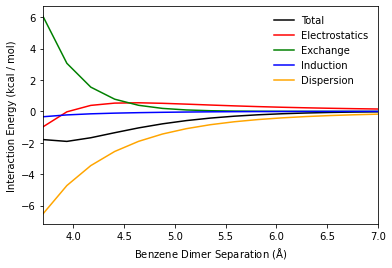

In [22]:
    for i, label in enumerate(colors):
        plt.plot(rs, [energy[i] for energy in energies], color=colors[i])
    plt.xlabel('Benzene Dimer Separation ($\mathrm{\AA}$)')
    plt.xlim(rs[0], rs[-1])
    plt.ylabel('Interaction Energy (kcal / mol)')
    #plt.legend(labels, frameon=False)
    plt.legend(['Total', 'Electrostatics', 'Exchange', 'Induction', 'Dispersion'], frameon=False)
    plt.savefig('bz_dimer_sapt.pdf')